# Dataset Titanic

Hacemos las importaciones necesarias

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [44]:
df = pd.read_csv(r"data/train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Para este ejercico unicamente tomaremos los parametros de Age (edad), Sex (Sexo) y Pclass (Clase)

In [45]:
df[["Age","Sex","Pclass"]]

,Age,Sex,Pclass
0,22.0,male,3
1,38.0,female,1
2,26.0,female,3
3,35.0,female,1
4,35.0,male,3
...,...,...,...
886,27.0,male,2
887,19.0,female,1
888,NaN,female,3
889,26.0,male,1


Obtendremos cuantos tipos de clases existen dentro de nuestro dataframe


In [46]:
print(df.groupby('Pclass').size())

Pclass
1    216
2    184
3    491
dtype: int64


En nuestra columna "Age" tenemos valores con NaN, utilizaremos la funcion .fillna() para cambiar esos valores a 0

In [47]:
df["Age"] = df["Age"].fillna(0)

A su vez, para aplicar nuestro metodo K Medias tenemos que cambiar los valores del Sexo por ceros y unos.
Esto nos generara un nuevo dataframe  el cual llamaremos "dfClean.

In [48]:
dfClean = df.replace({"male": 0, "female": 1})

In [49]:
dfClean.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,0.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


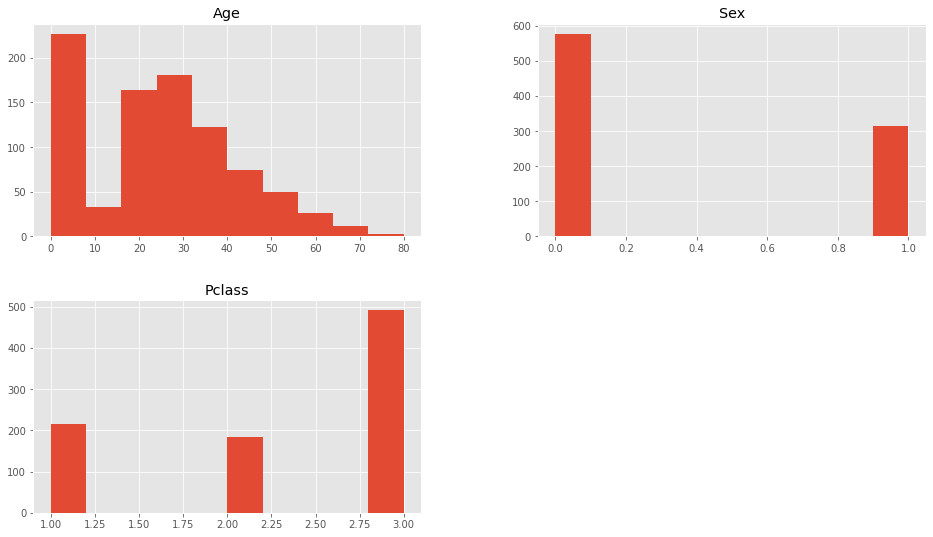

In [56]:
dfClean[["Age","Sex","Pclass"]].hist()
plt.show()


c:\Users\Gabriel\Documents\Patrones\reconocimientoEnv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


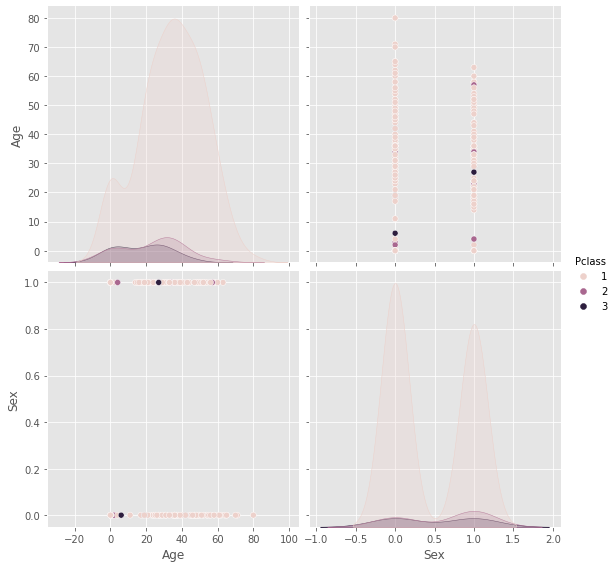

In [58]:
sb.pairplot(dfClean.dropna(), hue='Pclass',height=4,vars=["Age","Sex"],kind='scatter')